## Import Libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
data = pd.read_csv('dataset/Dataset of Diabetes .csv')
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


## Data Exploration & Perprocessing

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,340.500000,2.403977e+02,1.0,125.75,300.5,550.25,800.00
No_Pation,1000.0,270551.408000,3.380758e+06,123.0,24063.75,34395.5,45384.25,75435657.00
AGE,1000.0,53.528000,8.799241e+00,20.0,51.00,55.0,59.00,79.00
Urea,1000.0,5.124743,2.935165e+00,0.5,3.70,4.6,5.70,38.90
Cr,1000.0,68.943000,5.998475e+01,6.0,48.00,60.0,73.00,800.00
HbA1c,1000.0,8.281160,2.534003e+00,0.9,6.50,8.0,10.20,16.00
Chol,1000.0,4.862820,1.301738e+00,0.0,4.00,4.8,5.60,10.30
TG,1000.0,2.349610,1.401176e+00,0.3,1.50,2.0,2.90,13.80
HDL,1000.0,1.204750,6.604136e-01,0.2,0.90,1.1,1.30,9.90
LDL,1000.0,2.609790,1.115102e+00,0.3,1.80,2.5,3.30,9.90


In [4]:
data.describe(include='O').T

,count,unique,top,freq
Gender,1000,3,M,565
CLASS,1000,5,Y,840


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
data['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

- As we see here there are repeated values in the `CLASS` column (as some of them has extra spaces) so we need to remove them.

In [7]:
data['CLASS'].str.strip().value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [8]:
# strip class values
data['CLASS'] = data['CLASS'].str.strip()

In [9]:
data['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

- As we see here there are repeated values in the `Gender` column (as there is f and F) so we need to convert them to uppercase.

In [10]:
data['Gender'] = data['Gender'].str.upper()

In [11]:
data['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [12]:
# check for duplicates
data.duplicated().sum()

0

In [13]:
data.duplicated(subset='ID').sum()

200

In [14]:
data.duplicated(subset='No_Pation').sum()

39

In [15]:
data[data.duplicated(subset='ID')].sort_values(by='ID')

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
846,1,34325,M,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
847,2,44835,M,60,2.1,56,7.2,6.3,3.7,1.0,3.7,1.7,28.0,Y
848,3,41248,M,53,4.2,55,8.0,5.0,2.5,1.3,2.3,1.6,30.0,Y
849,4,18642,M,55,9.2,101,8.5,5.6,1.9,1.3,1.2,0.7,28.0,Y
850,5,51477,M,58,5.9,67,9.9,5.2,1.8,0.9,3.6,0.6,29.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,196,454316,M,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,Y
240,197,24037,M,69,5.9,71,10.4,5.4,1.3,1.7,3.1,0.6,33.0,Y
993,198,454316,M,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,Y
994,199,454316,M,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,Y


# Visualization

- visualize the distribution of numerical columns

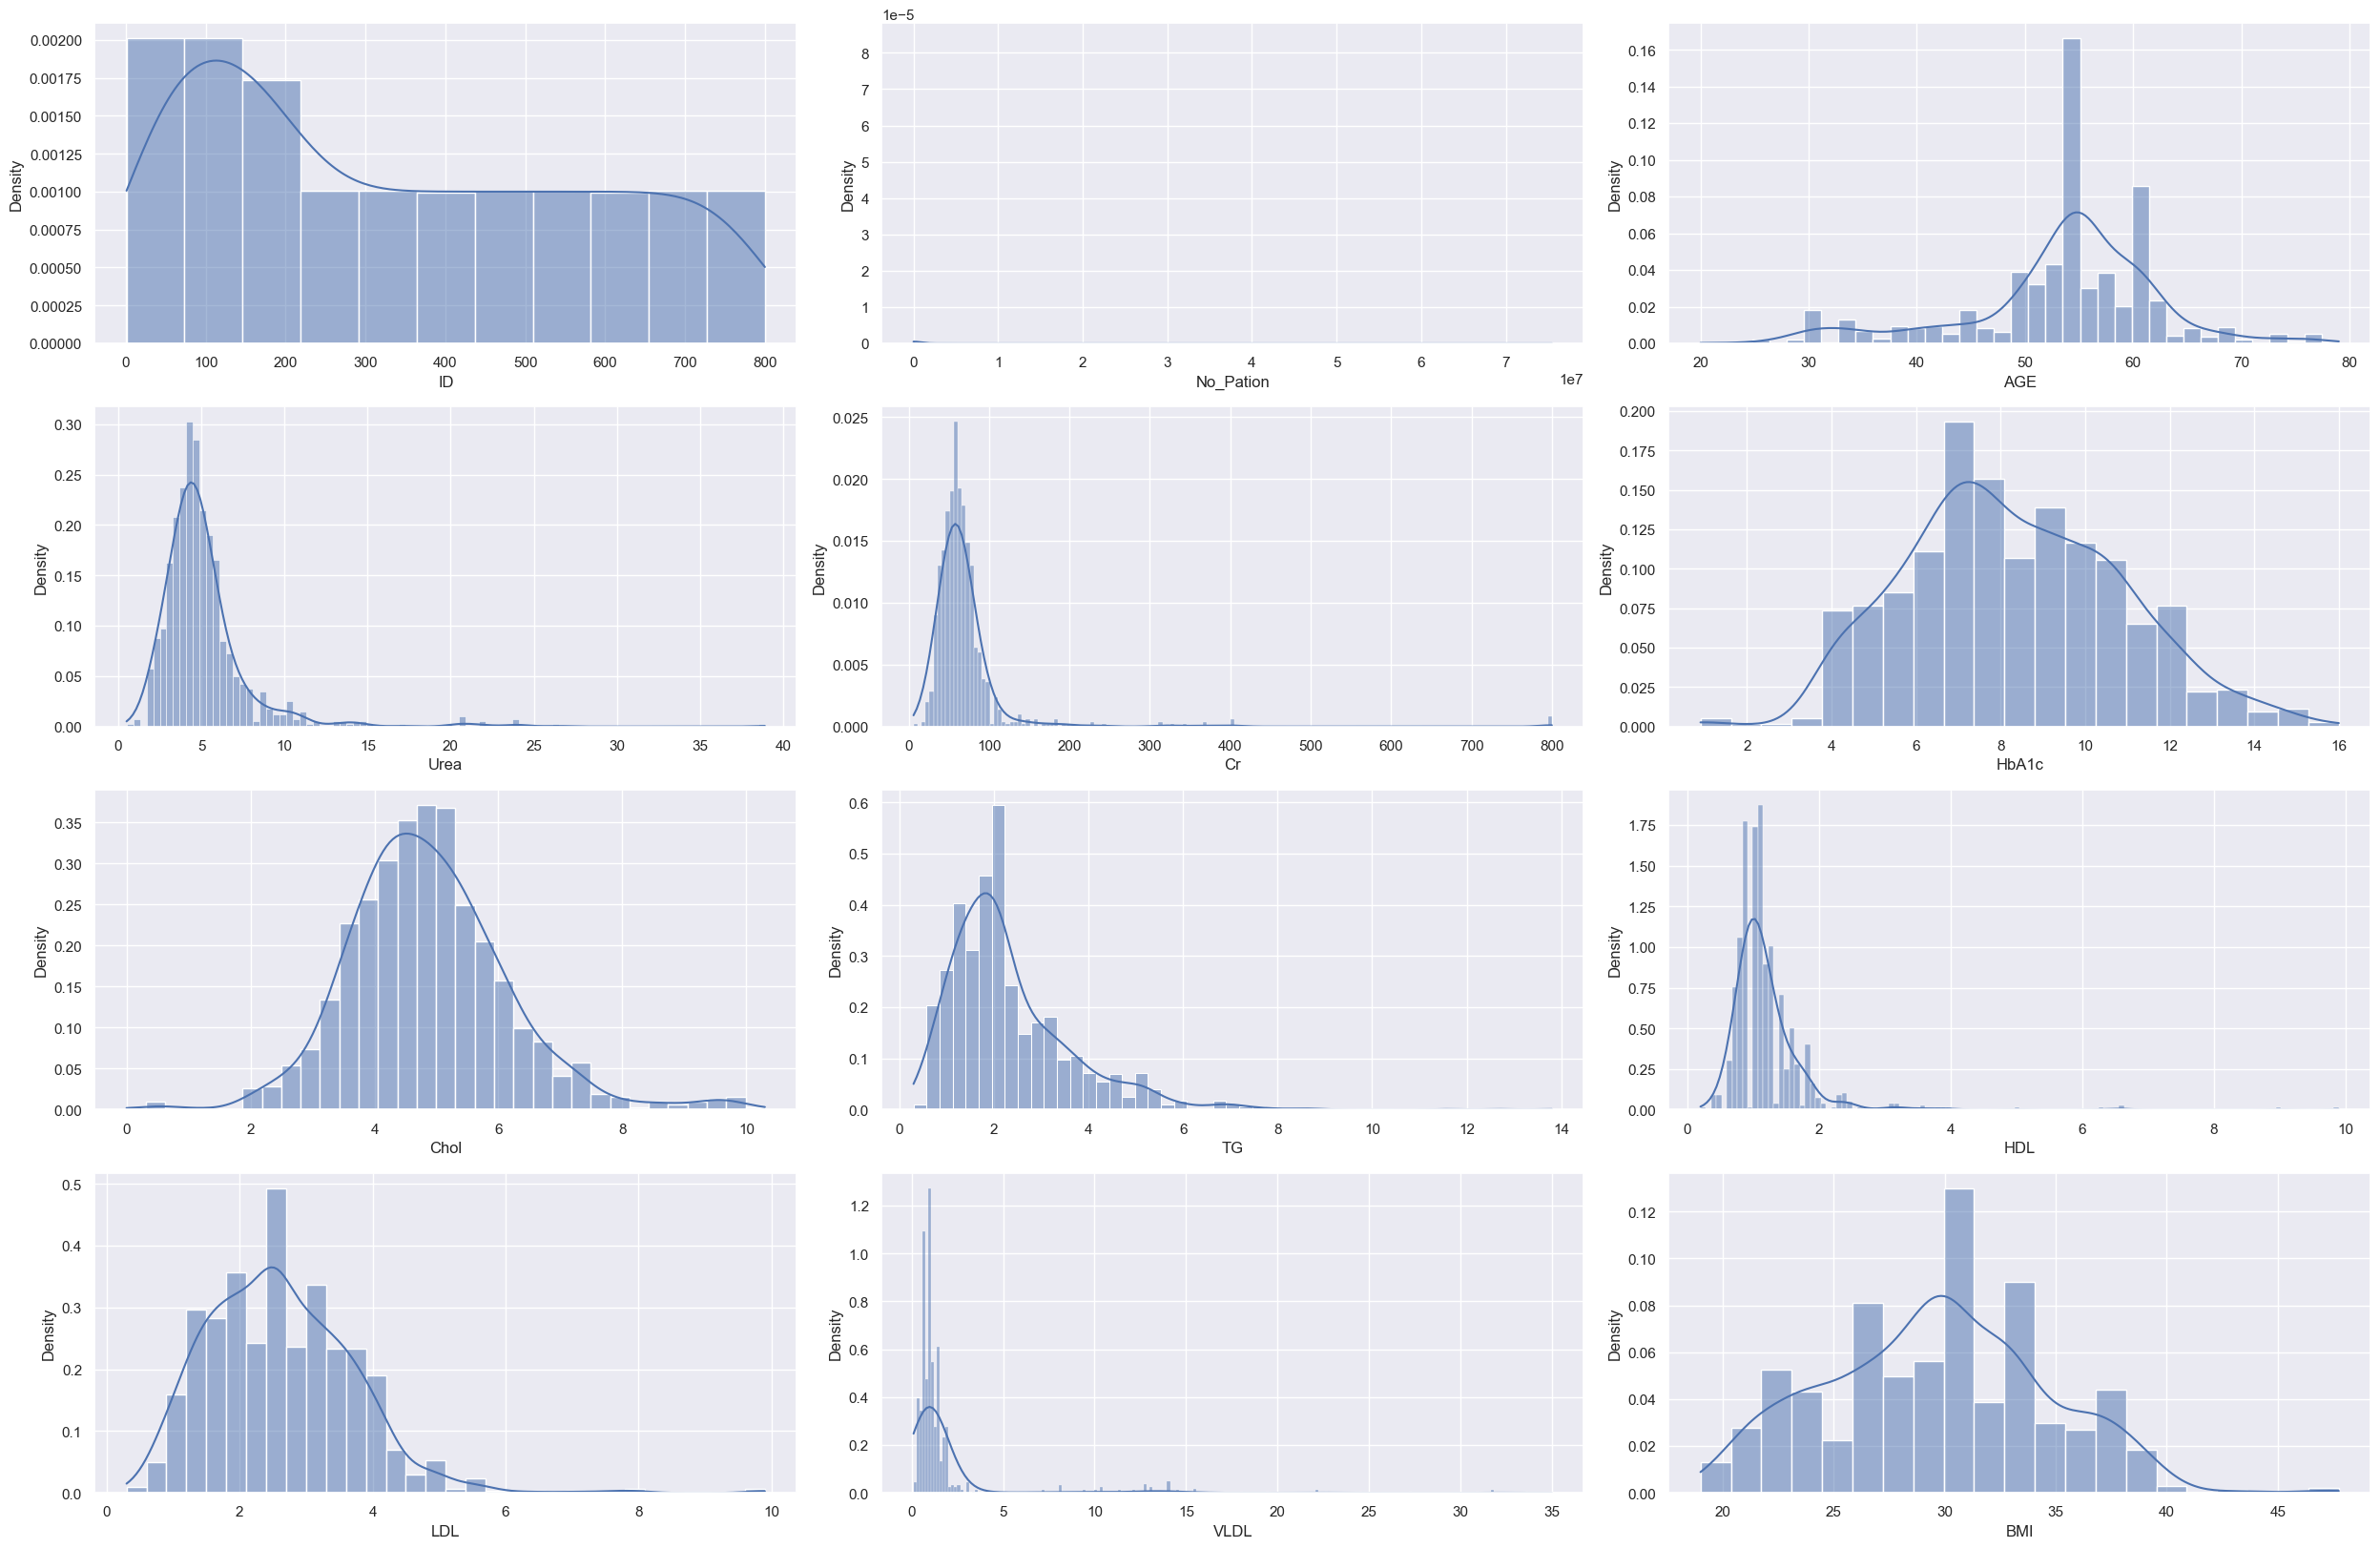

In [16]:
cols = data.select_dtypes(exclude='object').columns.to_list()
fig = plt.figure(figsize=(25, 40))
for i, col in enumerate(cols):
    plt.subplot(10, 3, i+1)
    sns.histplot(data[col], kde=True, stat='density')
fig.tight_layout(pad=1)

- As we see some columns are skewed

## Pair plot

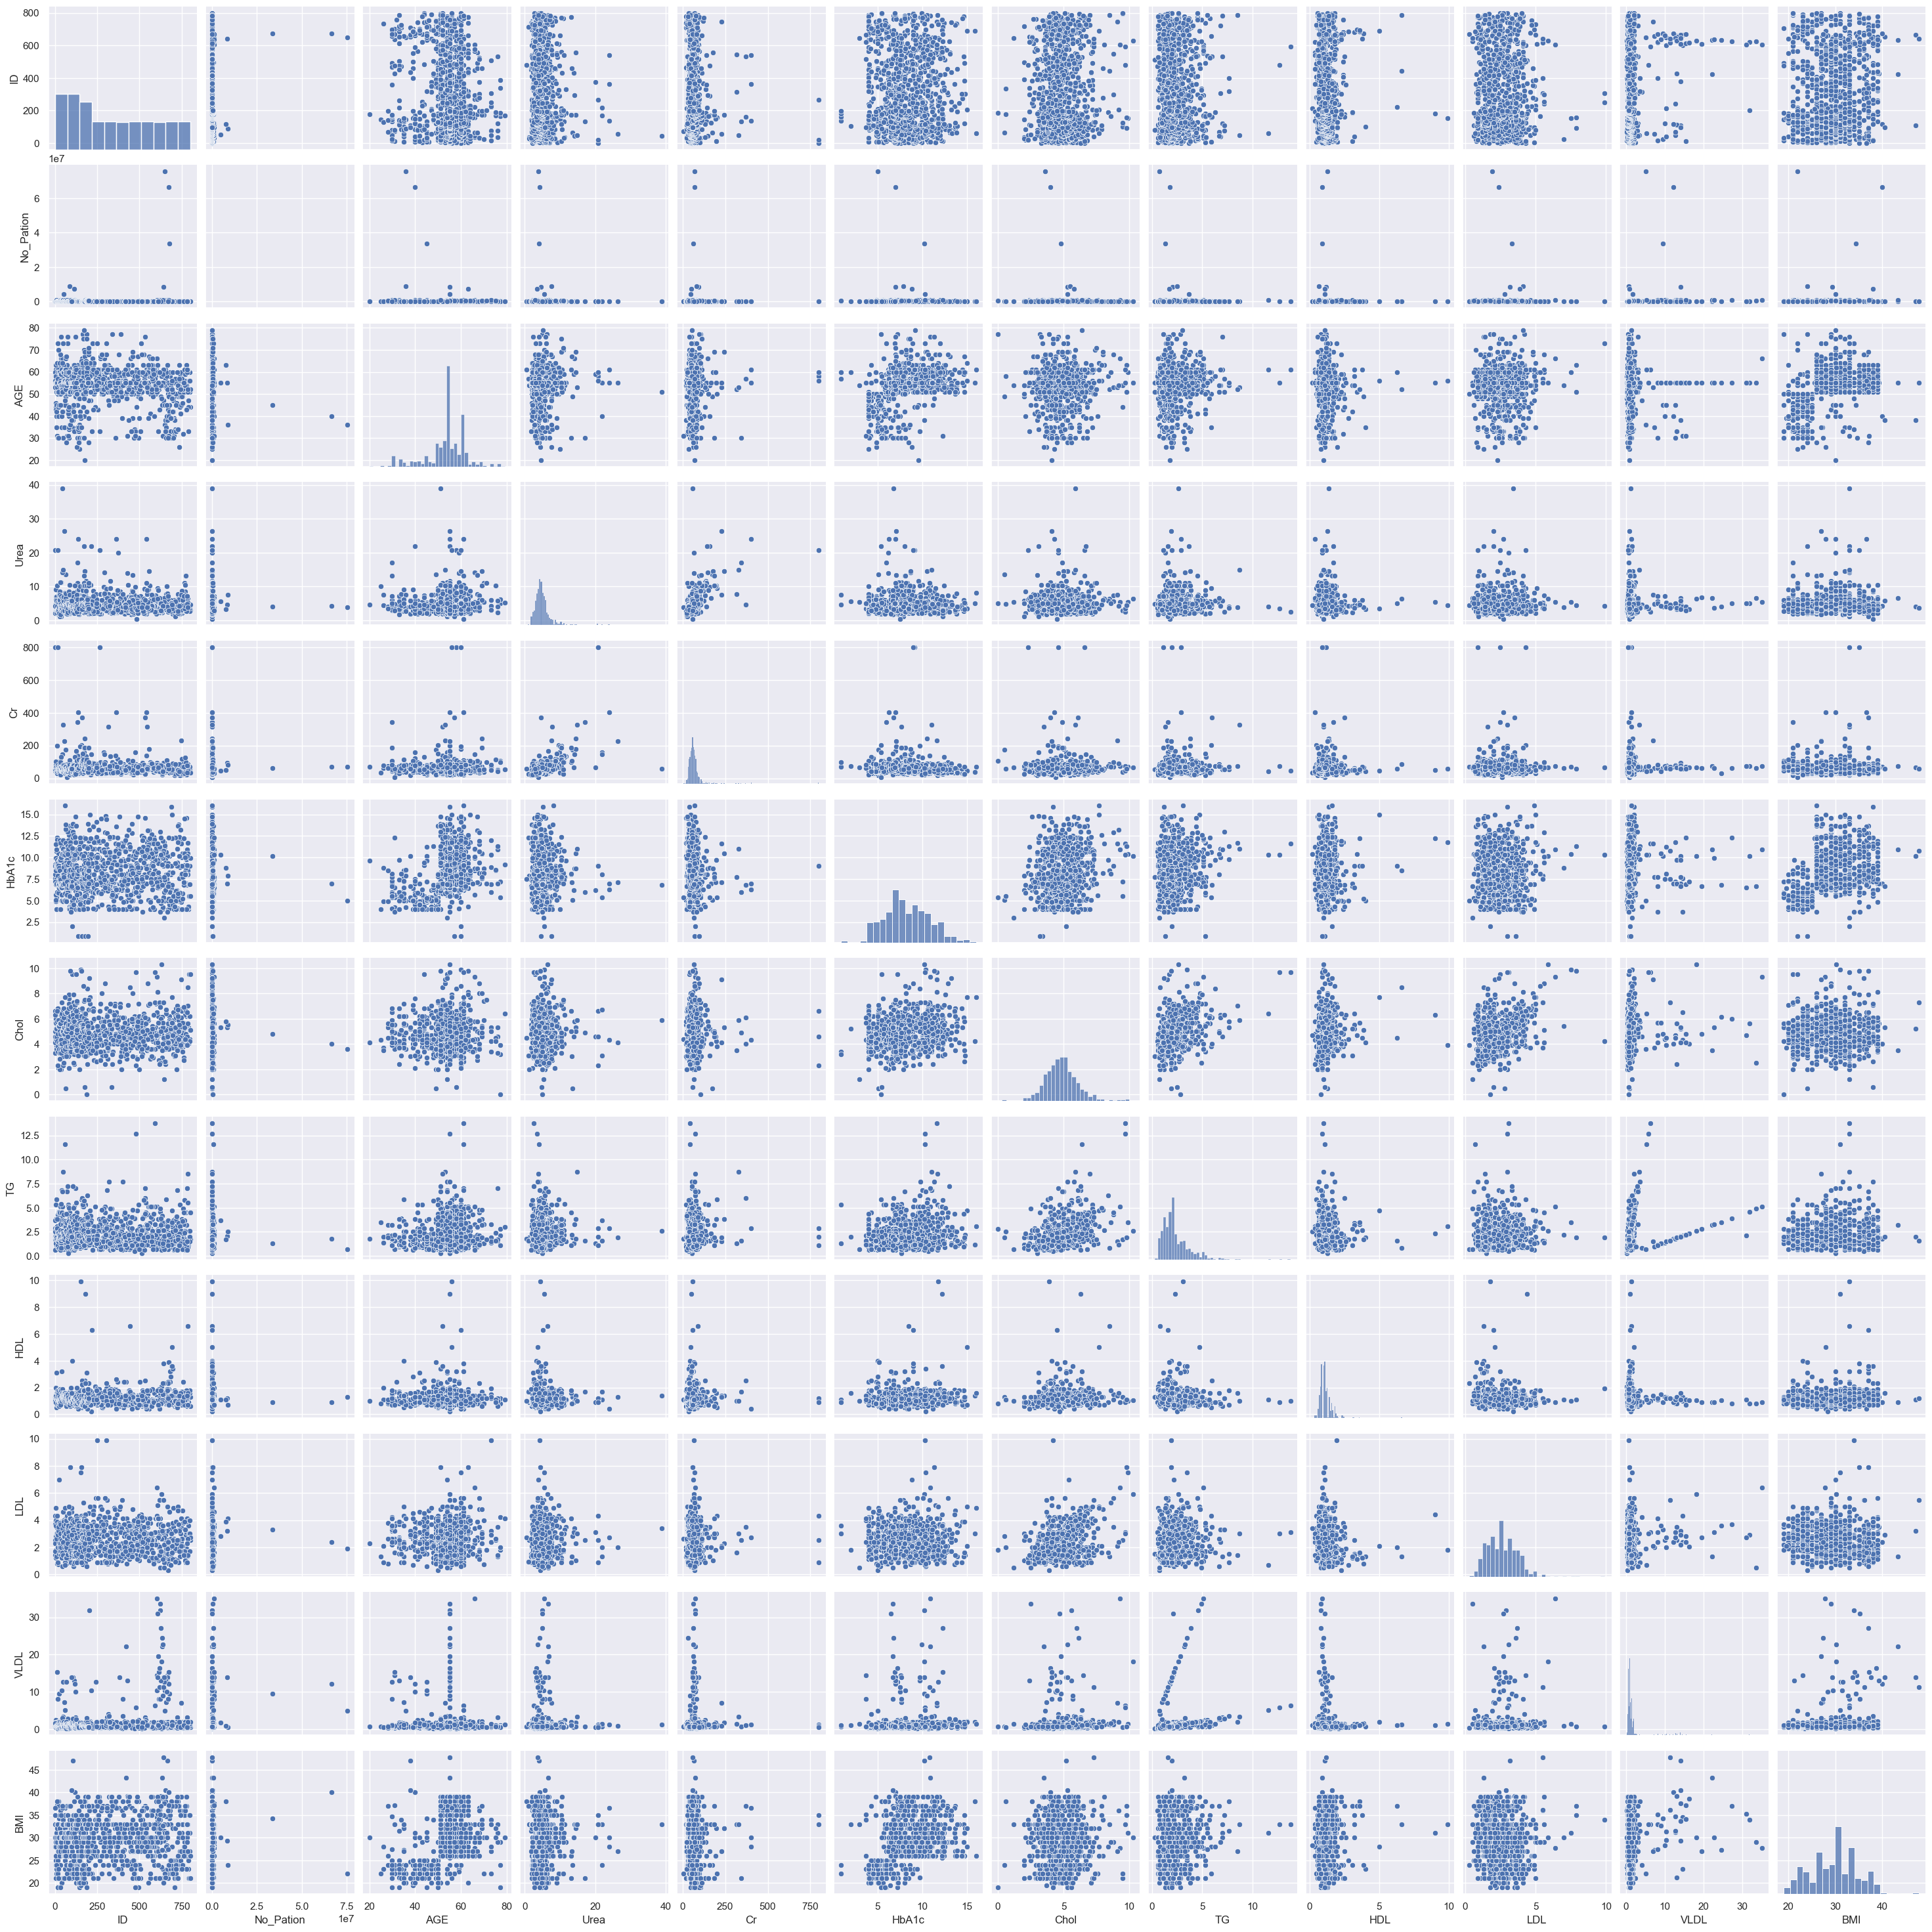

In [17]:
sns.pairplot(data= data)
plt.show()

## Box plot

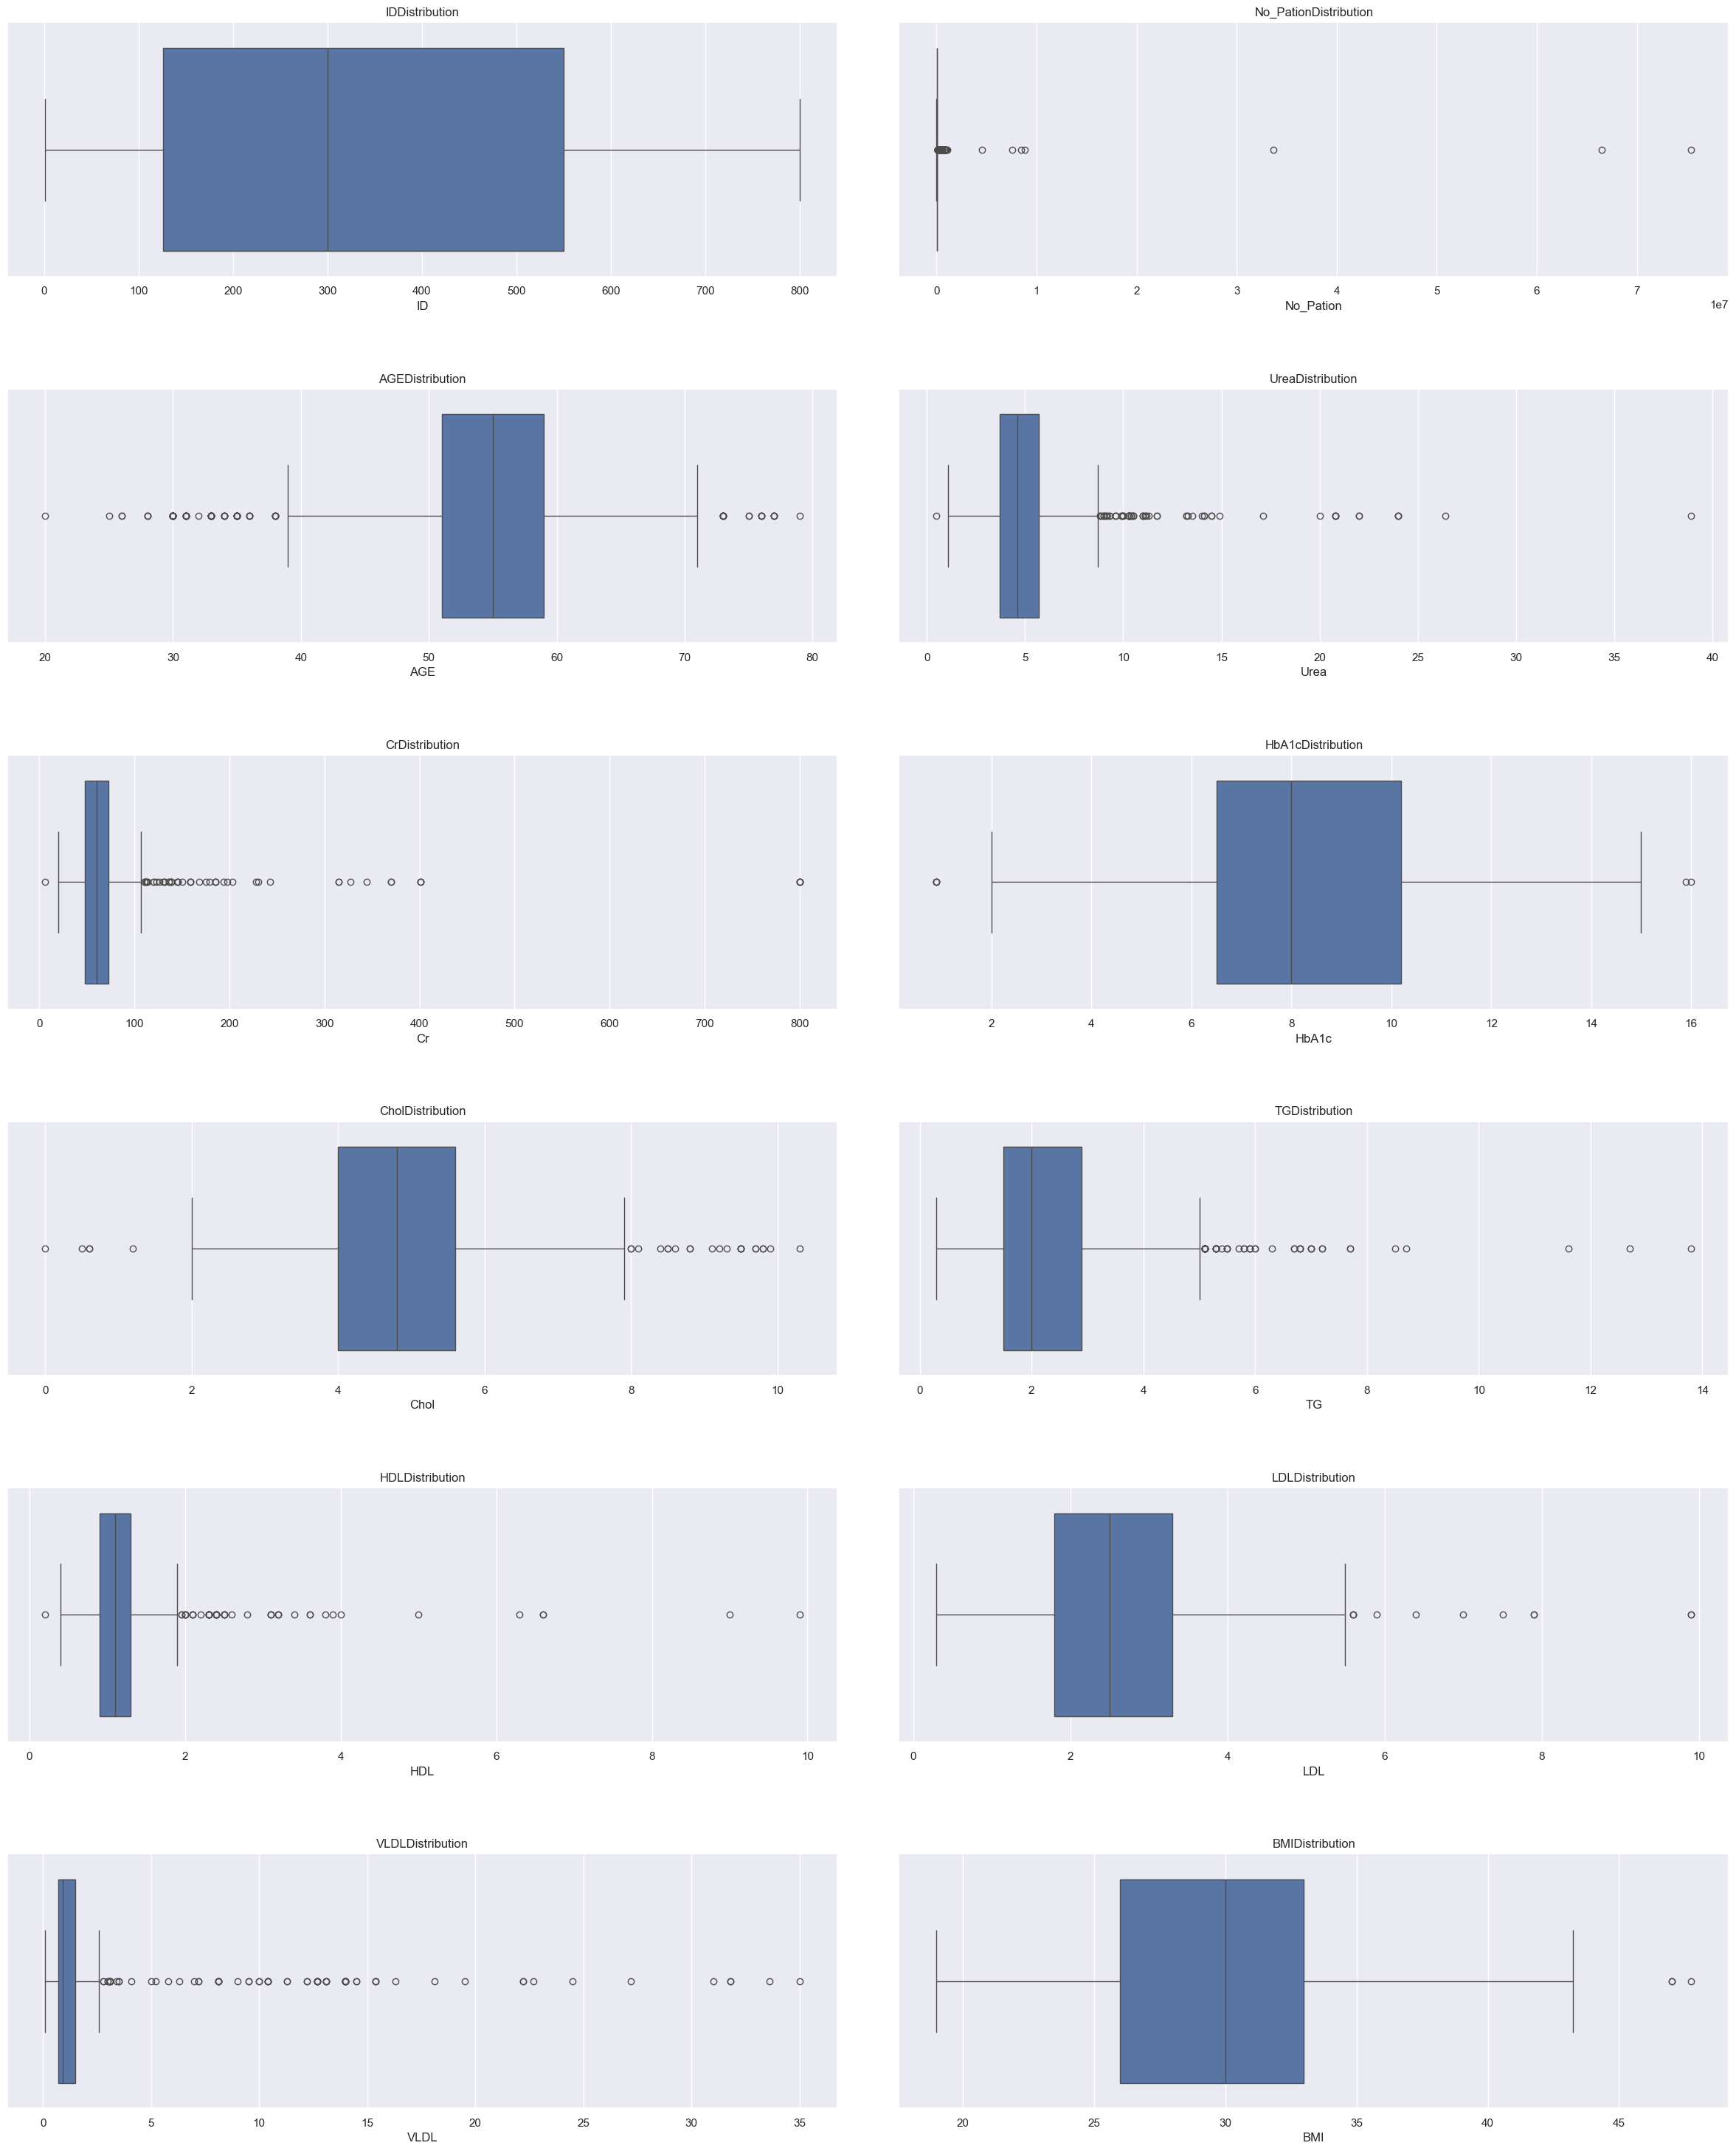

In [18]:
numeric_cols = data.select_dtypes(exclude='object').columns.to_list()
fig = plt.figure(figsize=(25, 50))
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 2, i+1)
    sns.boxplot(x=col, data=data)
    plt.title(col + 'Distribution')
fig.tight_layout(pad=5)

- As we see here most of the columns have outliers so we need to remove them

## Count Plot

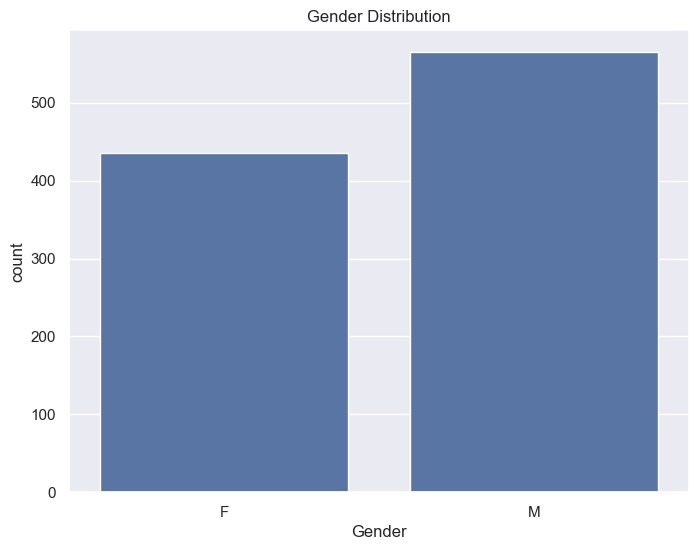

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

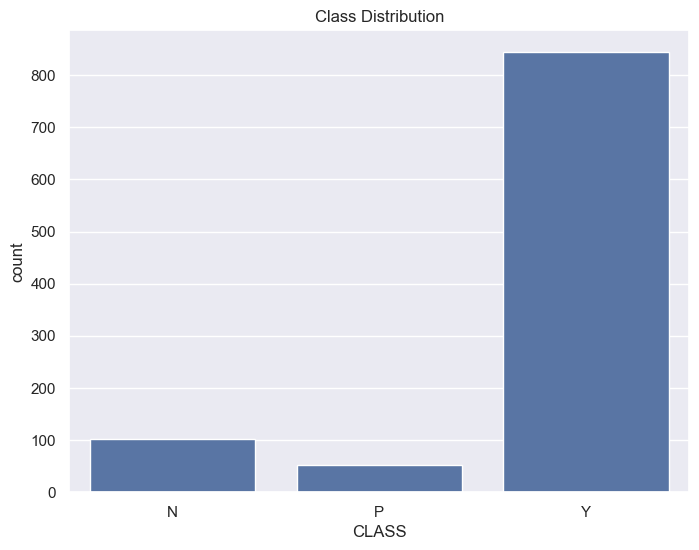

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CLASS', data=data)
plt.title('Class Distribution')
plt.show()

## Pie Plot

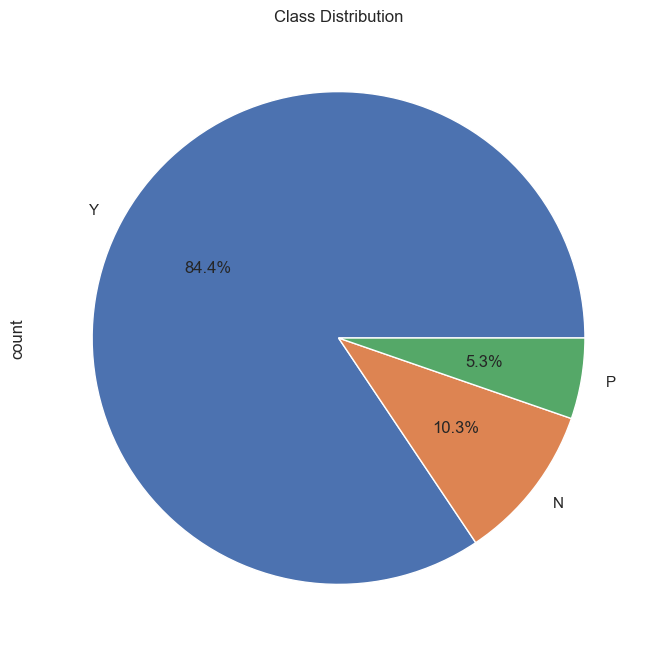

In [21]:
plt.figure(figsize=(8, 8))
data['CLASS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

- As we see most of the patients are diabetic

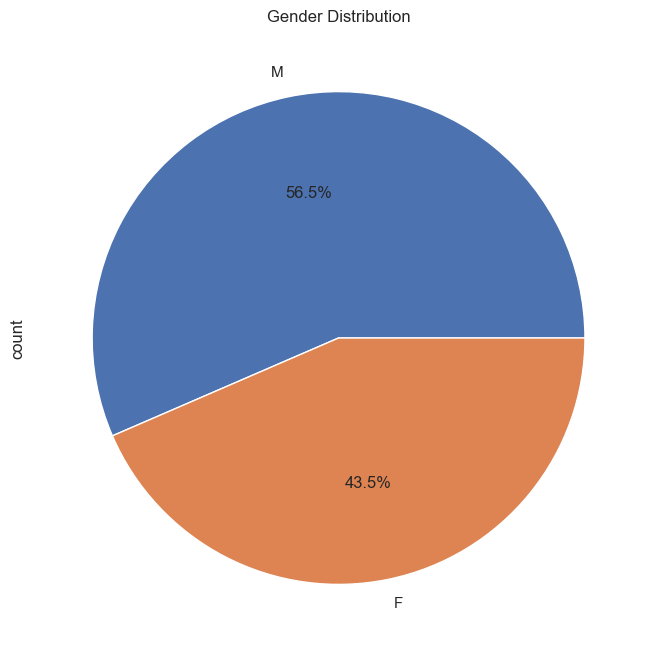

In [22]:
plt.figure(figsize=(8, 8))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Applying Label Encoder for Non Numerical data

In [23]:
LabelEncoder=LabelEncoder()
data_label=["Gender","CLASS"]
for label in data_label :
    LabelEncoder.fit(data[label])
    data[label]=LabelEncoder.transform(data[label])

In [24]:
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


## Detecting Outliers and Remove it

In [25]:
def detect_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

filtered_data = data[
    ~data.index.isin(detect_outliers_iqr(data,"AGE").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"Urea").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"Cr").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"HbA1c").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"Chol").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"TG").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"HDL").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"LDL").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"VLDL").index) & 
    ~data.index.isin(detect_outliers_iqr(data,"BMI").index) 
]


filtered_data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
5,634,34224,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,721,34225,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
7,421,34227,1,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0
13,132,34234,0,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,0
14,402,34235,0,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,193,454316,1,62,6.3,82,6.7,5.3,2.0,1.0,3.5,0.9,30.1,2
990,194,454316,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,2
991,195,4543,0,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,2
992,196,454316,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,2


# normalize Data

In [26]:
normalizer=StandardScaler()

filtered_data["AGE"] = normalizer.fit_transform(filtered_data["AGE"].values.reshape(-1, 1))
filtered_data["BMI"] = normalizer.fit_transform(filtered_data["BMI"].values.reshape(-1, 1))


C:\Users\ahmed\AppData\Local\Temp\ipykernel_35448\1959954226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["AGE"] = normalizer.fit_transform(filtered_data["AGE"].values.reshape(-1, 1))
C:\Users\ahmed\AppData\Local\Temp\ipykernel_35448\1959954226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["BMI"] = normalizer.fit_transform(filtered_data["BMI"].values.reshape(-1, 1))


In [27]:
filtered_data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
5,634,34224,0,-1.753516,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,-1.861247,0
6,721,34225,0,-0.859644,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,-1.206898,0
7,421,34227,1,-1.217193,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,-1.206898,0
13,132,34234,0,-1.753516,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,-1.425014,0
14,402,34235,0,-0.859644,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,-1.206898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,193,454316,1,1.285649,6.3,82,6.7,5.3,2.0,1.0,3.5,0.9,0.123610,2
990,194,454316,0,0.391777,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,-0.116318,2
991,195,4543,0,0.034228,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,0.756146,2
992,196,454316,1,0.034228,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,-0.552550,2


# Correlation Matrix

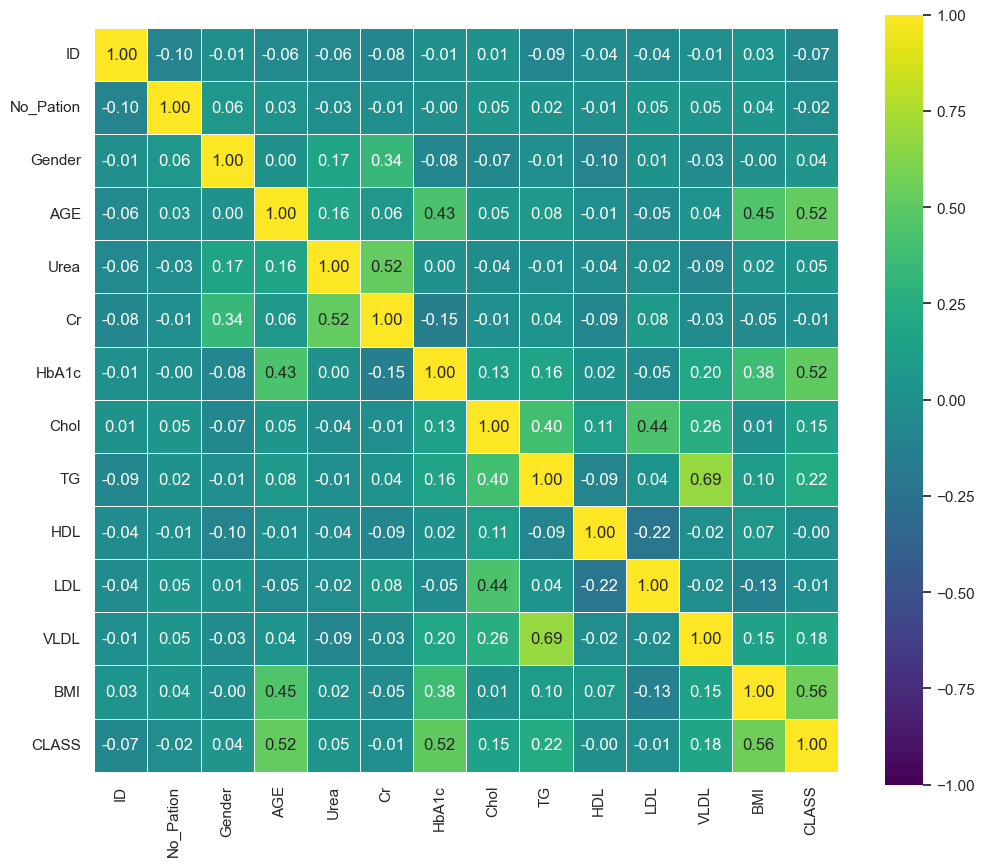

In [28]:
correlation_matrix = filtered_data.corr()
plt.figure(figsize = (12,10))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

- As we see the columns `AGE`, `HbA1c`, `BMI`  are highly correlated with the `CLASS`

In [29]:
# drop unnecessary columns
filtered_data.drop(['ID', 'No_Pation'], axis=1, inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_35448\3023694906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['ID', 'No_Pation'], axis=1, inplace=True)


In [30]:
X_data = filtered_data.drop('CLASS', axis=1)
y_data = filtered_data['CLASS']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#from yellowbrick.classifier import ConfusionMatrix

In [32]:
X_train, test_val_data, y_train, test_val_labels = train_test_split(
    X_data, y_data, test_size=0.3, random_state=30
    )
val_data, test_data, val_labels, test_labels = train_test_split(
    test_val_data, test_val_labels, test_size=0.5, random_state=30
)


In [33]:
X_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
965,1,-0.144547,5.0,88,6.8,6.7,3.7,0.9,2.9,1.7,0.538030
999,1,-0.144547,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,0.756146
58,0,-1.038419,2.1,38,5.0,4.2,0.8,0.9,3.0,0.4,-1.861247
248,0,0.928100,2.0,45,6.8,7.2,2.2,1.0,2.2,1.1,-0.552550
278,1,0.034228,3.8,46,6.0,4.3,1.5,1.0,2.6,0.7,1.192379
...,...,...,...,...,...,...,...,...,...,...,...
641,0,-0.144547,7.0,72,7.6,4.9,2.8,0.8,3.0,1.2,0.319914
254,0,0.034228,2.7,52,8.0,4.6,1.7,1.0,2.9,0.8,0.101798
247,0,0.928100,2.0,45,6.8,7.2,2.2,0.8,2.2,1.1,-0.552550
736,0,0.034228,4.7,34,9.9,5.1,4.5,0.6,2.7,2.0,0.974263


In [34]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
decision_tree_model.score(val_data, val_labels)

0.9803921568627451

In [36]:
decision_tree_model.score(test_data, test_labels)

0.9411764705882353

In [37]:
X_train.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI'],
      dtype='object')

In [38]:
decision_tree_model.feature_importances_

array([0.        , 0.04587224, 0.05121751, 0.        , 0.25745584,
       0.04311941, 0.10675269, 0.        , 0.03818584, 0.        ,
       0.45739647])

- feature importance

In [39]:
'''iris_cm = ConfusionMatrix(
    decision_tree_model, classes=['N', 'P', 'Y'],
    label_encoder={0: 'Y', 1: 'P', 2: 'N'}
)

iris_cm.fit(X_train, y_train)
iris_cm.score(test_data, test_labels)
iris_cm.show()'''

"iris_cm = ConfusionMatrix(\n    decision_tree_model, classes=['N', 'P', 'Y'],\n    label_encoder={0: 'Y', 1: 'P', 2: 'N'}\n)\n\niris_cm.fit(X_train, y_train)\niris_cm.score(test_data, test_labels)\niris_cm.show()"

In [40]:
print(classification_report(test_labels, decision_tree_model.predict(test_data)))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.33      0.50      0.40         2
           2       0.97      0.97      0.97        94

    accuracy                           0.94       102
   macro avg       0.70      0.71      0.70       102
weighted avg       0.95      0.94      0.94       102



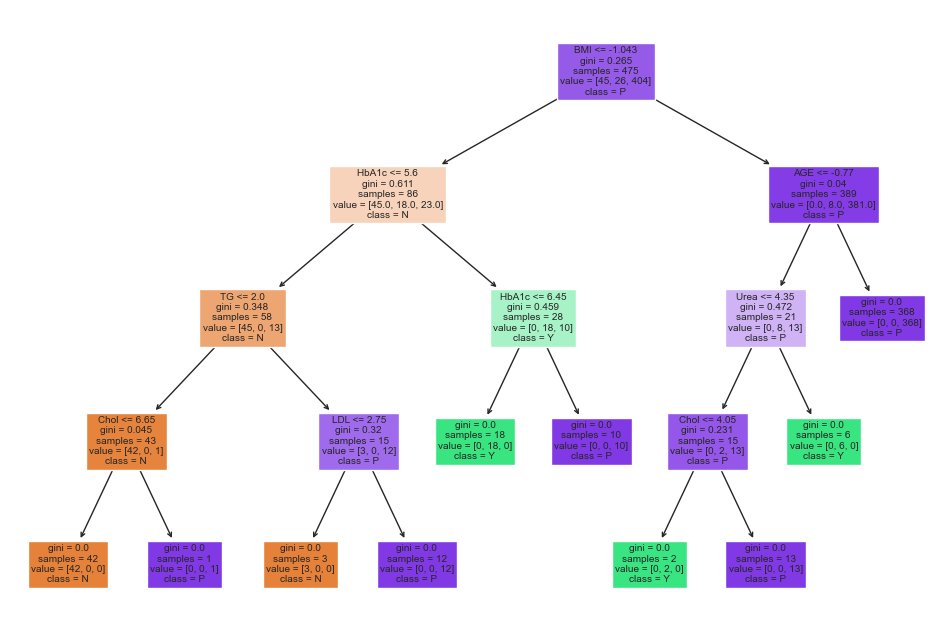

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=test_data.columns.to_list(), class_names=['N', 'Y', 'P'], filled=True)
plt.show()

# KNN

In [54]:
X = []
for i in range(5,20):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    X.append((i, sum(knn.predict(test_data)== test_labels)))

In [55]:
test_data.shape

(102, 11)

In [56]:
for i in X:
    print (i[0], i[1])

5 90
6 90
7 90
8 88
9 89
10 91
11 91
12 91
13 93
14 93
15 95
16 94
17 94
18 94
19 93


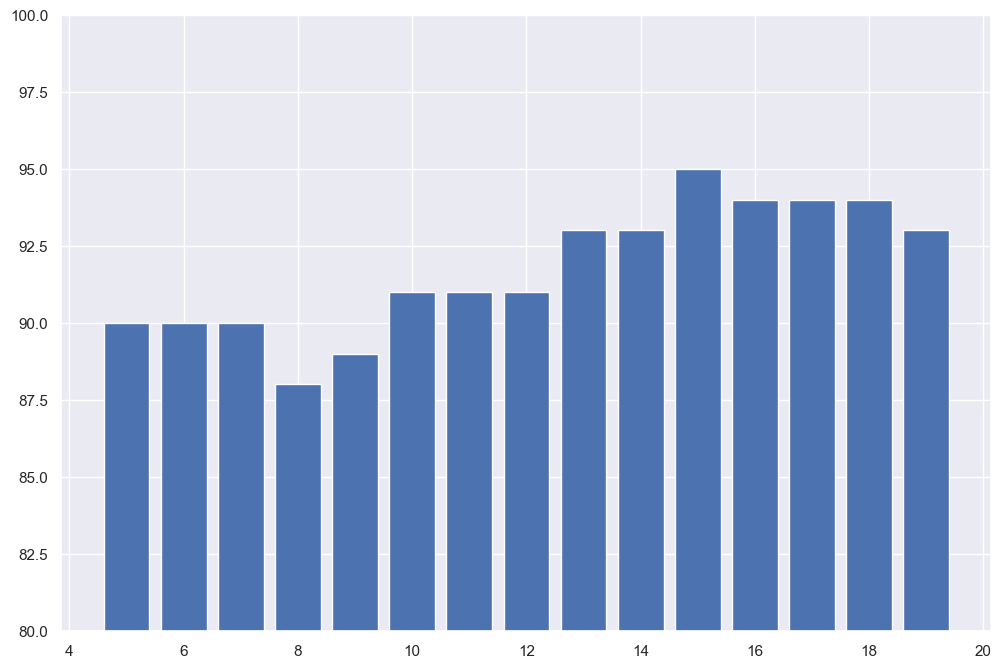

In [58]:
plt.figure(figsize=(12, 8))
plt.bar([i[0] for i in X ], [i[1] for i in X])

plt.ylim(80, 100)
plt.show()

In [59]:
knn = KNeighborsClassifier(15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [61]:
knn.score(test_data, test_labels)

0.9313725490196079

In [62]:
confusion_matrix(test_labels, knn.predict(test_data))

array([[ 2,  0,  4],
       [ 0,  0,  2],
       [ 1,  0, 93]], dtype=int64)

In [64]:
print(classification_report(test_labels, knn.predict(test_data)))

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.00      0.00      0.00         2
           2       0.94      0.99      0.96        94

    accuracy                           0.93       102
   macro avg       0.54      0.44      0.47       102
weighted avg       0.90      0.93      0.91       102



C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# Random Forest